<a href="https://colab.research.google.com/github/komalgawri/AI-Risk-Insights-Assistant/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random

In [ ]:
issues = [
    "Login issue",
    "Payment failed",
    "Account blocked",
    "Refund delayed",
    "Card not working",
    "Transaction not reflected"
]


In [ ]:
channels = ["Chat", "Email", "Call"]
priorities = ["Low", "Medium", "High"]

In [ ]:
data = []


In [ ]:
for i in range(300):
    data.append({
        "Ticket_ID": i+1,
        "Issue_Text": random.choice(issues),
        "Channel": random.choice(channels),
        "Priority": random.choice(priorities),
        "Resolution_Time": random.randint(1,5)
    })


In [ ]:
df = pd.DataFrame(data)
df.head()

,Ticket_ID,Issue_Text,Channel,Priority,Resolution_Time
0,1,Account blocked,Email,High,5
1,2,Transaction not reflected,Email,Low,2
2,3,Refund delayed,Chat,High,3
3,4,Login issue,Email,High,4
4,5,Card not working,Call,High,1


In [ ]:


print(df.head())
print(df.info())


   Ticket_ID                 Issue_Text Channel Priority  Resolution_Time
0          1            Account blocked   Email     High                5
1          2  Transaction not reflected   Email      Low                2
2          3             Refund delayed    Chat     High                3
3          4                Login issue   Email     High                4
4          5           Card not working    Call     High                1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ticket_ID        300 non-null    int64 
 1   Issue_Text       300 non-null    object
 2   Channel          300 non-null    object
 3   Priority         300 non-null    object
 4   Resolution_Time  300 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 11.8+ KB
None


In [ ]:
print(df['Issue_Text'].value_counts().head(10))

Issue_Text
Login issue                  62
Card not working             54
Account blocked              52
Transaction not reflected    49
Payment failed               43
Refund delayed               40
Name: count, dtype: int64


In [ ]:
print(df['Priority'].value_counts())

Priority
Medium    103
High       99
Low        98
Name: count, dtype: int64


In [ ]:
import re


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return text

In [ ]:
df['clean_text'] = df['Issue_Text'].apply(clean_text)

In [ ]:
#sentiment analysis

In [ ]:
pip install textblob


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['clean_text'].apply(get_sentiment)


In [ ]:
#identifying high-risk issues

In [ ]:
def risk_level(row):
    if row['Priority'] == 'High' and row['sentiment'] < 0:
        return "High Risk"
    elif row['Priority'] == 'Medium':
        return "Medium Risk"
    else:
        return "Low Risk"

df['Risk_Level'] = df.apply(risk_level, axis=1)


In [ ]:
print(df['Risk_Level'].value_counts())


Risk_Level
Low Risk       181
Medium Risk    103
High Risk       16
Name: count, dtype: int64


In [ ]:
#visualising

In [ ]:
import matplotlib.pyplot as plt


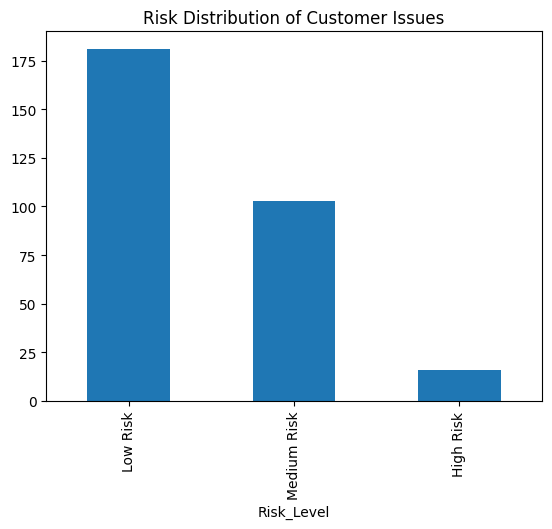

In [ ]:
df['Risk_Level'].value_counts().plot(kind='bar')
plt.title("Risk Distribution of Customer Issues")
plt.show()

In [ ]:
df.to_csv("final_ai_insights.csv", index=False)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [ ]:
print(df.groupby('Cluster')['Issue_Text'].head(3))


0               Account blocked
1     Transaction not reflected
2                Refund delayed
3                   Login issue
4              Card not working
5                Payment failed
6                Refund delayed
7                Refund delayed
10             Card not working
13                  Login issue
14                  Login issue
19              Account blocked
20    Transaction not reflected
21    Transaction not reflected
25              Account blocked
Name: Issue_Text, dtype: object


In [ ]:
summary_data = df.groupby('Cluster').agg({
    'Issue_Text':'count',
    'sentiment':'mean'
}).reset_index()

summary_data.columns = ['Cluster','Total_Issues','Avg_Sentiment']

print(summary_data)


   Cluster  Total_Issues  Avg_Sentiment
0        0            62       0.000000
1        1            52       0.000000
2        2            97      -0.221649
3        3            40       0.000000
4        4            49       0.000000


In [ ]:
def generate_insight(row):
    if row['Avg_Sentiment'] < 0:
        tone = "negative customer sentiment"
    else:
        tone = "neutral or positive sentiment"

    return f"Cluster {row['Cluster']} has {row['Total_Issues']} issues showing {tone}, indicating potential process improvement opportunities."

summary_data['AI_Insight'] = summary_data.apply(generate_insight, axis=1)

print(summary_data[['Cluster','AI_Insight']])


   Cluster                                         AI_Insight
0        0  Cluster 0.0 has 62.0 issues showing neutral or...
1        1  Cluster 1.0 has 52.0 issues showing neutral or...
2        2  Cluster 2.0 has 97.0 issues showing negative c...
3        3  Cluster 3.0 has 40.0 issues showing neutral or...
4        4  Cluster 4.0 has 49.0 issues showing neutral or...


In [ ]:
high_risk = df[df['Risk_Level']=="High Risk"].shape[0]
total = df.shape[0]

executive_summary = f"""
AI Analysis Summary:
- Total issues analyzed: {total}
- High-risk issues detected: {high_risk}
- Major patterns were automatically identified using NLP clustering.
- Key recommendation: Focus on clusters showing negative sentiment trends.
"""

print(executive_summary)



AI Analysis Summary:
- Total issues analyzed: 300
- High-risk issues detected: 16
- Major patterns were automatically identified using NLP clustering.
- Key recommendation: Focus on clusters showing negative sentiment trends.



In [ ]:
#ai assistant

In [ ]:
!pip install transformers


In [ ]:
from transformers import pipeline

ai_assistant = pipeline("text-generation", model="gpt2")


Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [ ]:
context = summary_data.to_string()

def ask_ai(question):
    prompt = f"""
You are an AI Operations Analyst.

Here is the analysis data:
{context}

Question: {question}

Answer:
"""

    response = ai_assistant(
        prompt,
        max_length=200,
        num_return_sequences=1,
        temperature=0.7
    )

    return response[0]['generated_text']


In [ ]:
print(ask_ai("What is the biggest risk area?"))


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=200) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



You are an AI Operations Analyst.

Here is the analysis data:
   Cluster  Total_Issues  Avg_Sentiment                                                                                                                  AI_Insight
0        0            62       0.000000  Cluster 0.0 has 62.0 issues showing neutral or positive sentiment, indicating potential process improvement opportunities.
1        1            52       0.000000  Cluster 1.0 has 52.0 issues showing neutral or positive sentiment, indicating potential process improvement opportunities.
2        2            97      -0.221649    Cluster 2.0 has 97.0 issues showing negative customer sentiment, indicating potential process improvement opportunities.
3        3            40       0.000000  Cluster 3.0 has 40.0 issues showing neutral or positive sentiment, indicating potential process improvement opportunities.
4        4            49       0.000000  Cluster 4.0 has 49.0 issues showing neutral or positive sentiment, indicatin